In [1]:
import os
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

In [2]:
os.chdir('/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project/')
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

In [1]:
# Import our dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup as bs

# AAPL

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf

In [15]:
aapl_sp_df.shape

(10481, 9)

## Data Preparation for ML

In [26]:
training_df = aapl_sp_df[8600:10000]

In [27]:
training_df.shape

(1400, 9)

In [29]:
test_df = aapl_sp_df[10000:]

In [30]:
test_df.shape

(481, 9)

In [31]:
#aapl_training_df = aapl_sp_df[(aapl_sp_df['Date'] > "2016-07-01") & (aapl_sp_df['Date'] < "2020-07-01")]

<AxesSubplot:title={'center':'Close'}, xlabel='Date'>

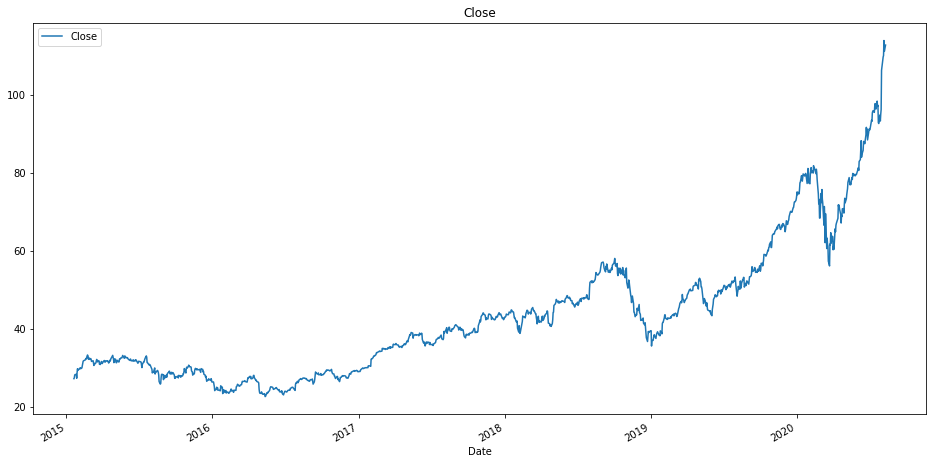

In [32]:
training_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Close")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

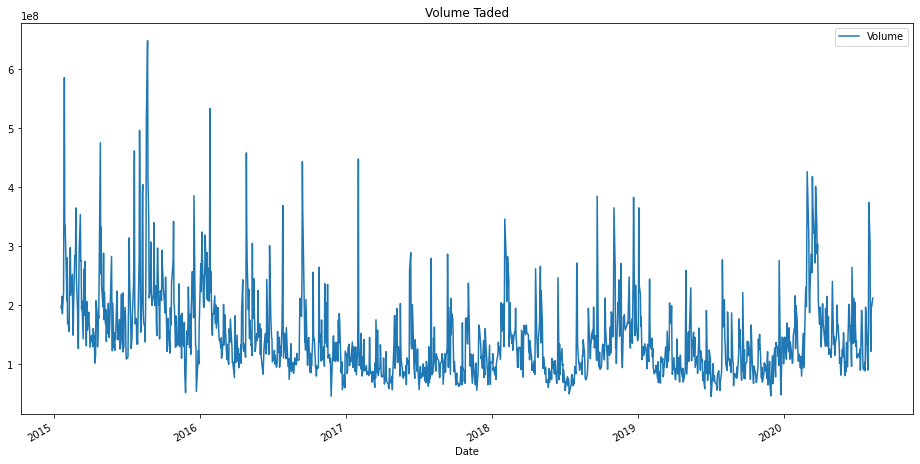

In [33]:
training_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [34]:
training_set = training_df.iloc[:, 2:3].values

In [36]:
training_set.shape 

(1400, 1)

In [37]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [38]:
training_set_scaled.shape

(1400, 1)

In [40]:
X_train = []
y_train = []

for i in range(60, 1400):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Deep Learning

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
modelo = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
42/42 [==============================] - 6s 60ms/step - loss: 0.0076
Epoch 2/100
42/42 [==============================] - 2s 50ms/step - loss: 0.0020
Epoch 3/100
42/42 [==============================] - 2s 49ms/step - loss: 0.0016
Epoch 4/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0014
Epoch 5/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0012
Epoch 6/100
42/42 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 7/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0012
Epoch 8/100
42/42 [==============================] - 2s 47ms/step - loss: 8.1489e-04
Epoch 9/100
42/42 [==============================] - 2s 47ms/step - loss: 8.8650e-04
Epoch 10/100
42/42 [==============================] - 2s 48ms/step - loss: 7.2491e-04
Epoch 11/100
42/42 [==============================] - 2s 48ms/step - loss: 7.2994e-04
Epoch 12/100
42/42 [==============================] - 2s 47ms/step - loss: 7.5754e-04
Epoch

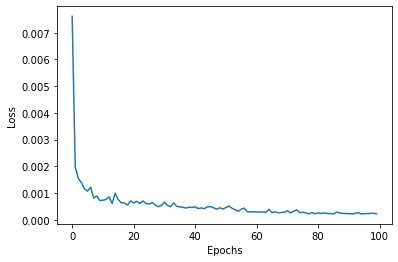

In [45]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [46]:
real_stock_price = test_df.iloc[: , 2:3].values

In [47]:
real_stock_price.shape

(481, 1)

In [49]:
dataset_total = pd.concat([training_df['Open'], test_df['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 481):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_test.shape

(421, 60, 1)

In [50]:
predicted_stock_price = model.predict(X_test)

14/14 [==============================] - 1s 52ms/step


In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

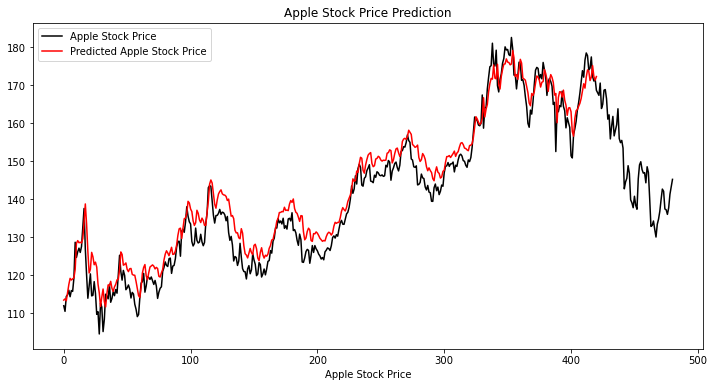

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()